# Coursework 1: Image filtering

In this coursework you will practice techniques for image filtering. The coursework includes coding questions and written questions. Please read both the text and the code in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Save and Export Notebook As...) the notebook as a PDF file, which contains your code, results and answers, and upload the PDF file onto [Scientia](https://scientia.doc.ic.ac.uk).

* Instead of clicking the Export button, you can also run the following command instead: `jupyter nbconvert coursework_01_solution.ipynb --to pdf`

* If Jupyter complains about some problems in exporting, it is likely that pandoc (https://pandoc.org/installing.html) or latex is not installed, or their paths have not been included. You can install the relevant libraries and retry. Alternatively, use the Print function of your browser to export the PDF file.

* If Jupyter-lab does not work for you at the end (we hope not), you can use Google Colab to write the code and export the PDF file.

## Dependencies:

You need to install Jupyter-Lab (https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html) and other libraries used in this coursework, such as by running the command:
`pip3 install [package_name]`


In [1]:
# Import libaries (provided)
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter (20 points).

Read the provided input image, add noise to the image and design a moving average filter for denoising.

You are expected to design the kernel of the filter and then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

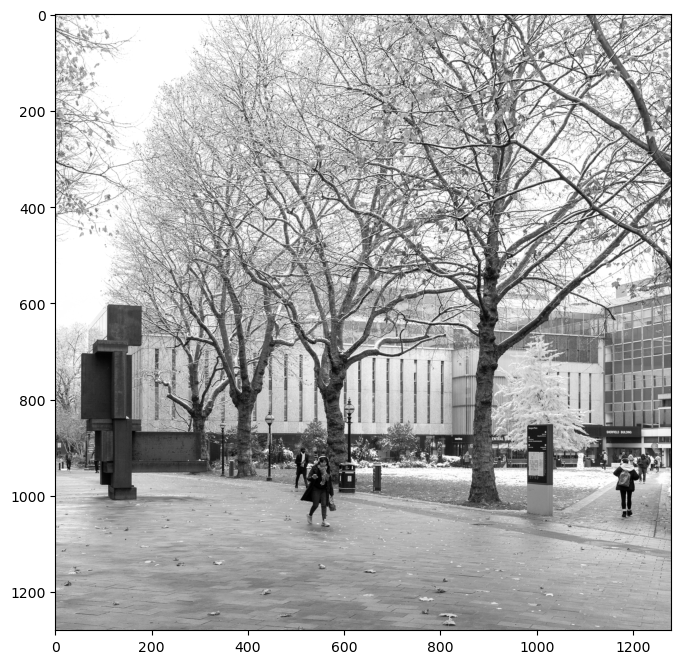

In [2]:
# Read the image (provided)
image = imageio.imread('campus_snow.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(8, 8)

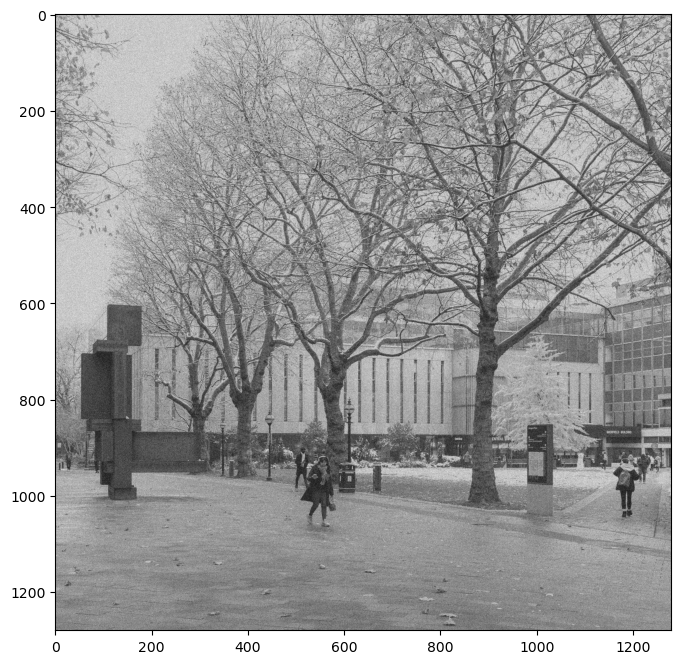

In [3]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results.

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


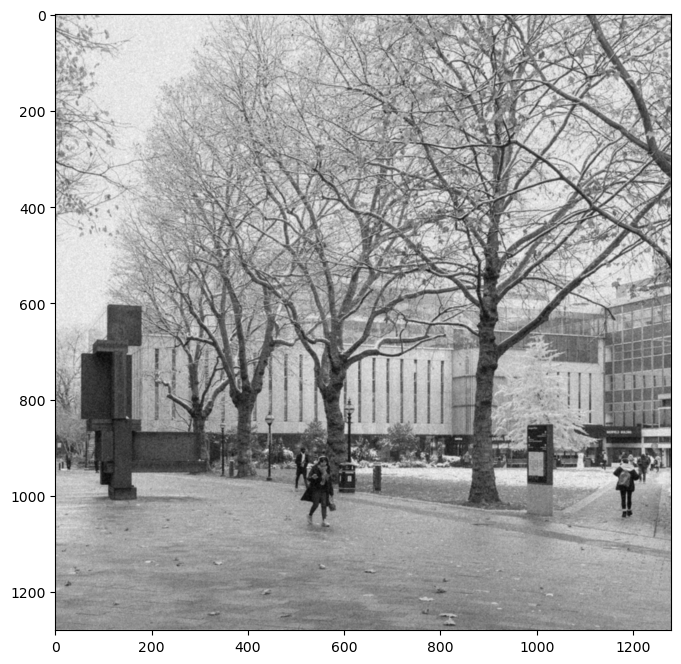

In [4]:
# Design the filter h
### Insert your code ###
h = np.ones((3, 3)) / 9

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same', boundary='wrap')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter.

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

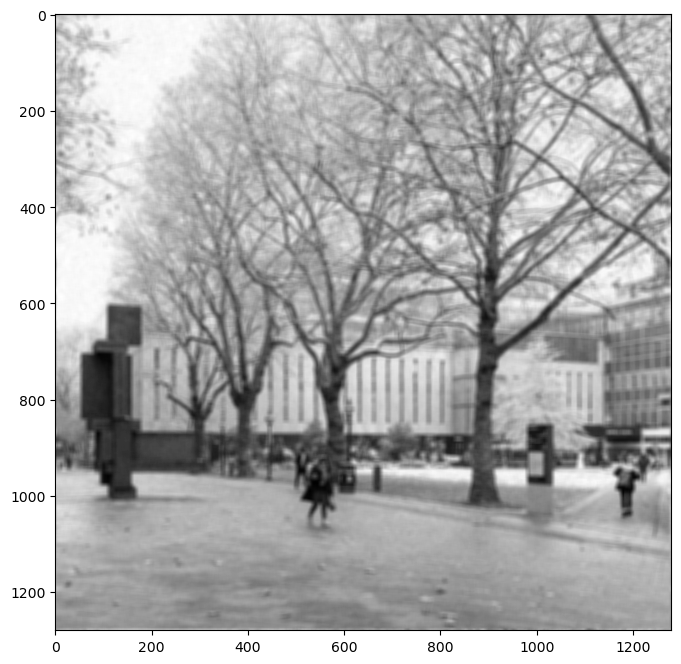

In [5]:
# Design the filter h
### Insert your code ###
h = np.ones((11, 11), dtype=float) / (11 ** 2)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same', boundary='wrap')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results?

### Insert your answer ###



The smaller kernel (3x3) provides less smoothing. More of the image's details and sharpnessare preserved, but some noise are left unfiltered as they average over a smaller area. The larger kernel (11x11) gives more smoothing because they average over a larger area. More of the image's noise are removed and details are blurred. However, it leads to a significant loss of image sharpness and detail.

## 2. Edge detection (56 points).

Perform edge detection using Sobel filtering, as well as Gaussian + Sobel filtering.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image.

sobel_x:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
sobel_y:
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


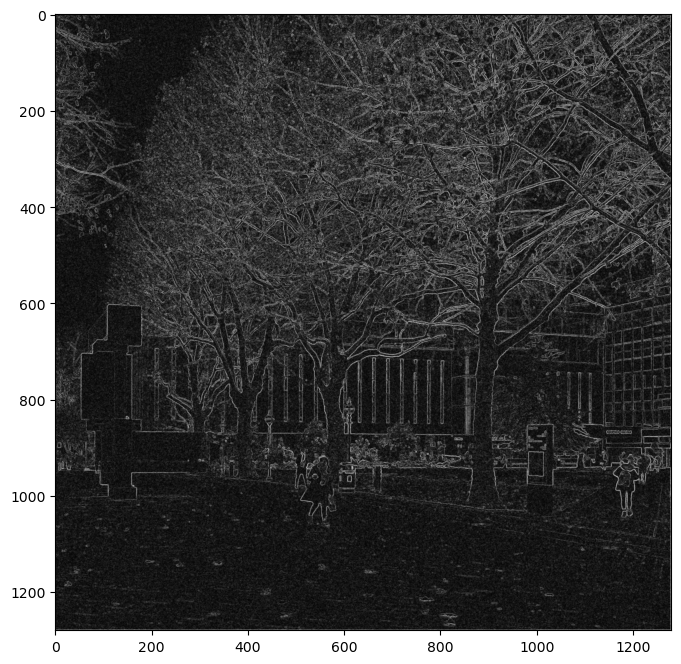

In [6]:
# Design the filters
### Insert your code ###
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]])

# Image filtering
### Insert your code ###
filtered_x = scipy.signal.convolve2d(image_noisy, sobel_x, mode='same', boundary='fill', fillvalue=0)
filtered_y = scipy.signal.convolve2d(image_noisy, sobel_y, mode='same', boundary='fill', fillvalue=0)

# Calculate the gradient magnitude
### Insert your code ###
grad_mag = np.sqrt(filtered_x**2 + filtered_y**2)

# Print the filters (provided)
print('sobel_x:')
print(sobel_x)
print('sobel_y:')
print(sobel_y)

# Display the magnitude map (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$.

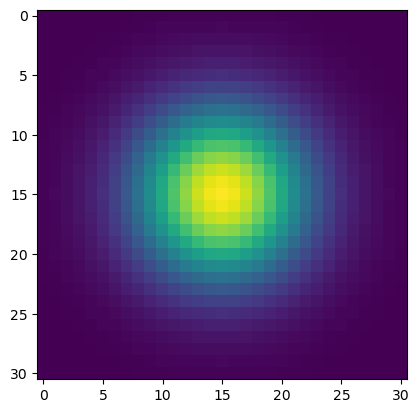

In [7]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    
    ### Insert your code ###
    k = 3
    size = 2 * k * sigma + 1
    if size % 2 == 0:
        size += 1  

    i = np.linspace(-k * sigma, k * sigma, size)
    j = np.linspace(-k * sigma, k * sigma, size)
    i, j = np.meshgrid(i, j)

    h = (1 / (2 * np.pi * sigma**2)) * np.exp(-(i**2 + j**2) / (2 * sigma**2))

    return h

# Visualise the Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 5 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering and show the gradient magintude map.

Gaussian smoothing took 3.3088271617889404 seconds.


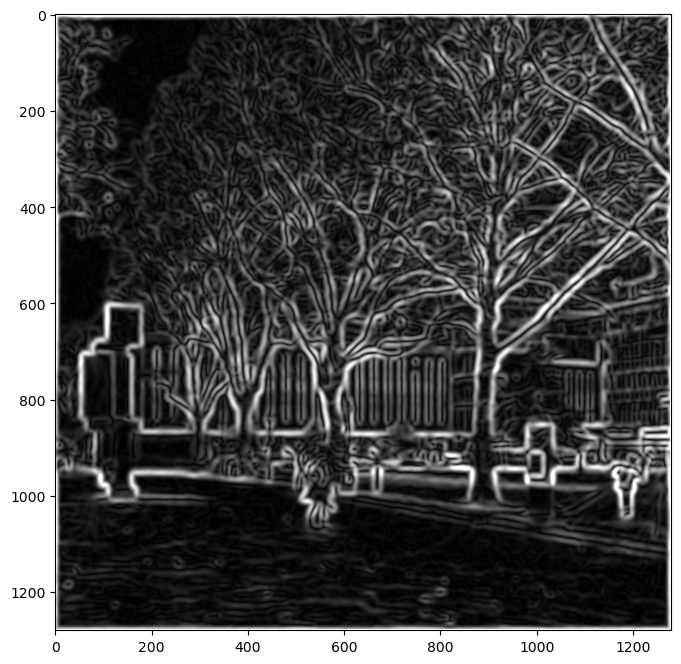

In [8]:
# Construct the Gaussian filter
### Insert your code ###
h = gaussian_filter_2d(5)

# Perform Gaussian smoothing and count time
### Insert your code ###
start_time = time.time()
image_G = scipy.signal.convolve2d(image_noisy, h, mode='same', boundary='fill', fillvalue=0)
end_time = time.time()
print(f"Gaussian smoothing took {end_time - start_time} seconds.")

# Image filtering
### Insert your code ###
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]])

filtered_x = scipy.signal.convolve2d(image_G, sobel_x, mode='same', boundary='fill', fillvalue=0)
filtered_y = scipy.signal.convolve2d(image_G, sobel_y, mode='same', boundary='fill', fillvalue=0)

# Calculate the gradient magnitude
### Insert your code ###
grad_mag = np.sqrt(filtered_x**2 + filtered_y**2)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

### 2.4 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively.

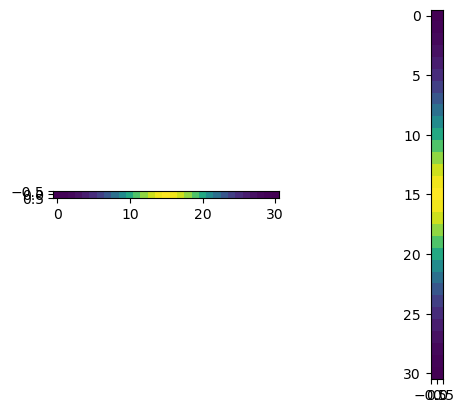

In [9]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    
    ### Insert your code ###
    k=3
    size = 2 * k * sigma + 1
    if size % 2 == 0:
        size += 1  

    x = np.linspace(-k * sigma, k * sigma, size)
    h = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-x**2 / (2*sigma**2))
   
    return h

# sigma = 5 pixel (provided)
sigma = 5

# The Gaussian filter along x-axis. Its shape is (1, sz).
### Insert your code ###
h_x =gaussian_filter_1d(sigma).reshape(1, -1)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
### Insert your code ###
h_y = gaussian_filter_1d(sigma).reshape(-1, 1)

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 5 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering, show the gradient magnitude map and check whether it is the same as the previous one without separable filtering.

Separable Gaussian smoothing took 0.466363 seconds.
Mean difference between gradient magnitudes: 4.252864463130525e-13


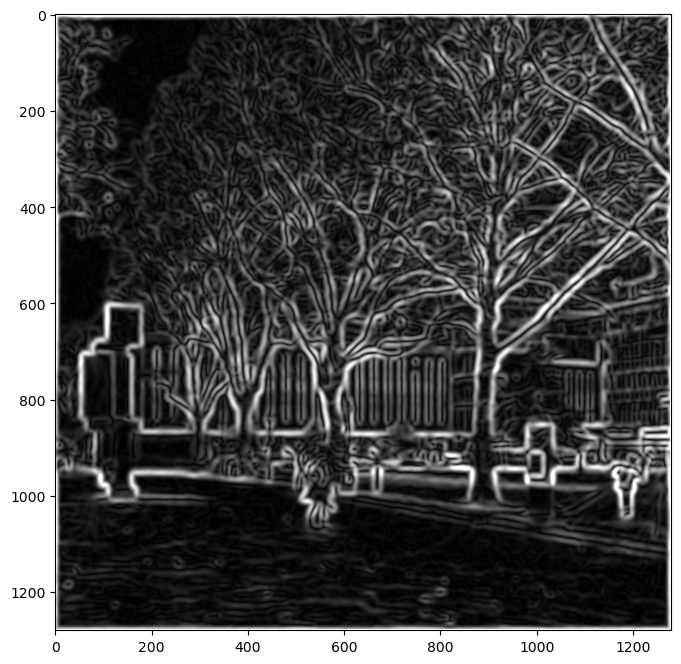

In [10]:
# Perform separable Gaussian smoothing and count time
### Insert your code ###
h = gaussian_filter_1d(5)
start_time = time.time()
image_G = scipy.signal.convolve2d(image_noisy, h[:, np.newaxis], mode='same', boundary='fill', fillvalue=0)
image_G = scipy.signal.convolve2d(image_G, h[np.newaxis, :], mode='same', boundary='fill', fillvalue=0)
end_time = time.time()
print(f"Separable Gaussian smoothing took {end_time - start_time:.6f} seconds.")

# Image filtering
### Insert your code ###
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]])

filtered_x = scipy.signal.convolve2d(image_G, sobel_x, mode='same', boundary='fill', fillvalue=0)
filtered_y = scipy.signal.convolve2d(image_G, sobel_y, mode='same', boundary='fill', fillvalue=0)

grad_mag2 = np.sqrt(filtered_x**2 + filtered_y**2)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.
### Insert your code ###
mean_difference = np.mean(np.abs(grad_mag2 - grad_mag))
print(f"Mean difference between gradient magnitudes: {mean_difference}")

### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time.

### Insert your answer ###

Gaussian smoothing reduces noise and detail in the image, so that Sobel filter can produce clear edges with less noise. The gradient magnitude map emphasizes the transitions from low to high intensity, indicating potential edges. Using separable filters for Gaussian smoothing is computationally more efficient than using a 2D Gaussian kernel. This is because the number of computations is reduced from O(n^2) to O(2n) for an n×n kernel, which can result in faster processing times especially for large sigma values where the kernel size increases.

The mean difference between the gradient magnitudes obtained from separable and non-separable Gaussian smoothing is small (close to zero), it suggests that the separable filtering has effectively produced the same result as the non-separable filtering. The use of separable filters does not influence quality of the edge detection.

## 3. Challenge: Implement 2D image filters using Pytorch (24 points).

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [11]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor.

In [12]:
# Expand the dimension of the numpy array
### Insert your code ###
expanded = np.expand_dims(image_noisy, axis=(0, 1))

# Convert to a Pytorch tensor using torch.from_numpy
### Insert your code ###
image_tensor = torch.from_numpy(expanded).float()

### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter and perform filtering.

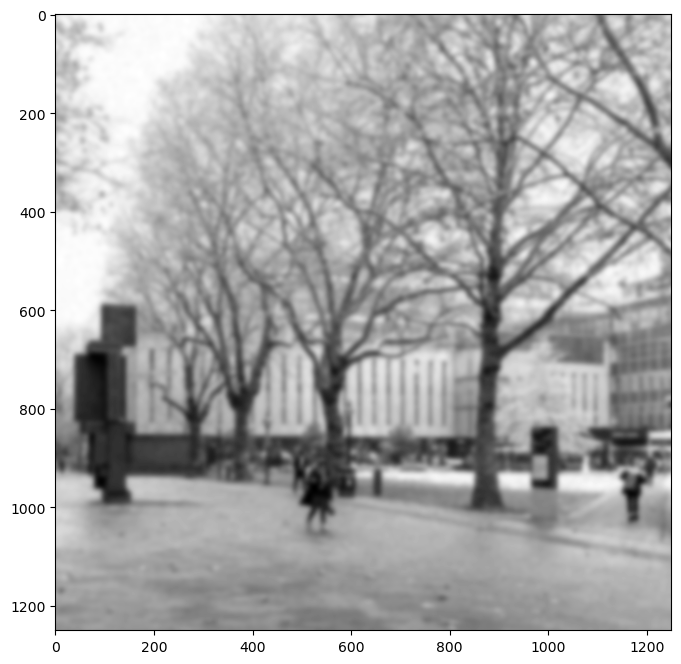

In [13]:
# A 2D Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)

# Create the Conv2D filter
### Insert your code ###
h_tensor = torch.from_numpy(h).float().unsqueeze(0).unsqueeze(0) 

conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=h_tensor.shape[-1], bias=False)
conv.weight = torch.nn.Parameter(h_tensor, requires_grad=False)

# Filtering
### Insert your code ###
with torch.no_grad():
    image_filtered_tensor = conv(image_tensor)

image_filtered = image_filtered_tensor.squeeze().detach().numpy()

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 3.3 Implement Pytorch Conv2D filters to perform Sobel filtering on Gaussian smoothed images, show the gradient magnitude map.

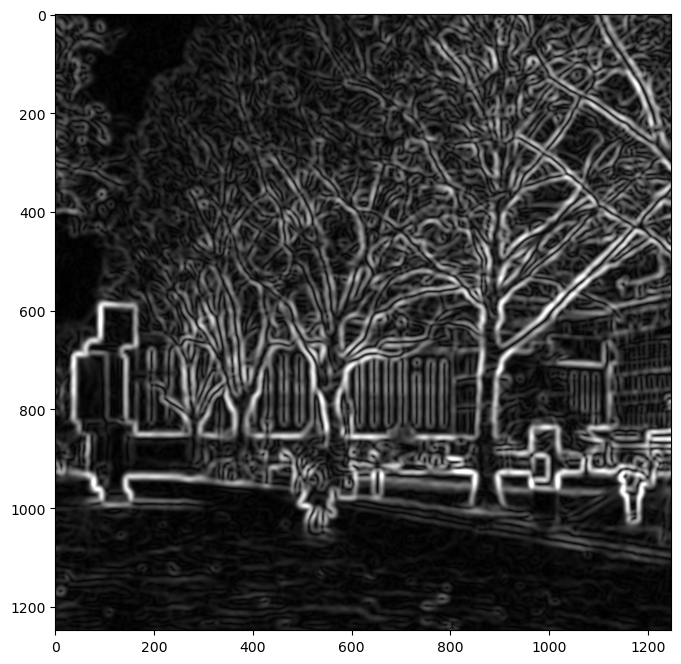

In [15]:
# Create Conv2D filters
### Insert your code ###
sobel_x_kernel = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)
sobel_y_kernel = torch.tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

conv_sobel_x = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, bias=False)
conv_sobel_y = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, bias=False)

conv_sobel_x.weight = torch.nn.Parameter(sobel_x_kernel, requires_grad=False)
conv_sobel_y.weight = torch.nn.Parameter(sobel_y_kernel, requires_grad=False)

# Perform filtering
### Insert your code ###
image_filtered_tensor = torch.from_numpy(image_filtered).unsqueeze(0).unsqueeze(0).float()
with torch.no_grad():
    filtered_x = conv_sobel_x(image_filtered_tensor)
    filtered_y = conv_sobel_y(image_filtered_tensor)

# Calculate the gradient magnitude map
### Insert your code ###
grad_mag3 = torch.sqrt(filtered_x**2 + filtered_y**2).squeeze()

# Visualise the gradient magnitude map (provided)
plt.imshow(grad_mag3, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)